# Introduction to Supervised Learning with scikit-learn

Supervised learning is a core type of machine learning where models are trained on **labeled data** — that is, data containing both input features and known output labels. The model learns to map features to labels so that it can make accurate predictions on new, unseen data.  

Common supervised learning tasks include **classification** (predicting discrete categories) and **regression** (predicting continuous values). The **scikit-learn** library provides a rich collection of tools and algorithms to implement these methods efficiently.

In this tutorial, we will explore the **fundamentals of supervised learning** using **scikit-learn** in Python. You will learn how to:
- Prepare and preprocess data for training
- Build and train supervised learning models
- Make predictions on unseen data
- Evaluate model performance using key metrics

We will cover essential concepts, algorithms, and practical examples to help you confidently get started with supervised learning in scikit-learn.


## Glossary of ML Terms
There are a number of terms specific to Machine Learning that you will find repeatedly in this notebook. 

- **Learning**: In Machine Learning, you'll hear about "learning a model." This is what you probably know as 
*fitting* or *estimating* a function, or *training* or *building* a model. These terms are all synonyms and are 
used interchangeably in the machine learning literature.
- **Training Examples**: These are what you probably know as *data points* or *observations* or *rows* or *instances*. 
- **Features**: These are what you probably know as *independent variables*, *attributes*, *predictors*, 
or *explanatory variables.*
- **Target Variable**: In some cases, we use this term to mean the variable being predicted
- **Loss Function**: 
- **Underfitting**: This happens when a model is too simple and does not capture the structure of the data well 
enough.
- **Overfitting**: This happens when a model is too complex or too sensitive to the noise in the data; this can
result in poor generalization performance, or applicability of the model to new data. 
- **Regularization**: This is a general method to avoid overfitting by applying additional constraints to the model. 
For example, you can limit the number of features present in the final model, or the weight coefficients applied
to the (standardized) features are small.
- **Supervised learning** involves problems with one target or outcome variable (continuous or discrete) that we want
to predict, or classify data into. Classification, prediction, and regression fall into this category. We call the
set of explanatory variables $X$ **features**, and the outcome variable of interest $Y$ the **label**.
- **Unsupervised learning** involves problems that do not have a specific outcome variable of interest, but rather
we are looking to understand "natural" patterns or groupings in the data - looking to uncover some structure that 
we do not know about a priori. Clustering is the most common example of unsupervised learning, another example is 
principal components analysis (PCA).

## Scikit-learn Model Building Workflow

Before training and testing machine learning models using **scikit-learn**, ensure your data meets the following criteria:

-  **Data Format**  
  Your input data must be structured as a **NumPy array**, **Pandas DataFrame**, or **SciPy sparse matrix**.

- **Numeric Data Only**  
  All features must be **numeric**. Convert categorical variables using encoding techniques such as:  
  - `LabelEncoder`  
  - `OneHotEncoder`  
  - or `pd.get_dummies()`

- **No Missing Values**  
  scikit-learn models generally **cannot handle NaN values**. Address missing data by:  
  - Dropping rows or columns: `df.dropna()`  
  - Imputing missing values: `SimpleImputer`

- **Consistent Feature Dimensions**
  The number of columns (features) in your training data must match those used during prediction.


### Model Building Process

#### Overview
The standard workflow for training and evaluating models in **scikit-learn** follows five key steps:

1. **Data Preparation** → Clean, encode, and format data (numeric, no missing values).  
2. **Initialize Model** → Create a model instance from `sklearn`.  
3. **Fit Model** → Train the model using your training data (`X_train`, `y_train`).  
4. **Predict** → Generate predictions on unseen data (`X_test`).  
5. **Evaluate** → Assess model performance using appropriate metrics (e.g., accuracy, precision, RMSE).


#### **Basic Syntax**
```python
from sklearn.module import Model

# 1️⃣ Initialize the model
model = Model()

# 2️⃣ Train (fit) the model on data
model.fit(X_train, y_train)

# 3️⃣ Predict on new or unseen data
predictions = model.predict(X_test)

# 4️⃣ View or analyze results
print(predictions)

## Python Setup
Before we begin, run the code cell below to initialize the libraries we'll be using in this assignment. We're already familiar with `numpy`, `pandas`, and `psycopg2` from previous tutorials. Here we'll also be using [`scikit-learn`](http://scikit-learn.org) to fit modeling.

In [25]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification, make_moons, load_wine, load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                             mean_squared_error, r2_score)


## Working Directory Setup
As usual, its a good practice to create global variables indicating where our data is sitting, where we will save models and other outputs as needes

In [127]:
# Uncomment the following lines and add your code to define the directories and files
DIR_DATA = Path.cwd().parents[1].joinpath("data")

# Population and buildings Dataset
FILE_BUILDINGS = DIR_DATA/"population-demography/adm4-population-buildings.csv"

# Diabetes Dataset
FILE_DIABETES = DIR_DATA/"other/diabetes.csv"

# NTL Dataset
FILE_NTL = DIR_DATA/"ntl/cell-ntl-2015-2020-2024.csv"

# MUSIC Dataset
FILE_MUSIC = DIR_DATA/"other/music.csv"

In [128]:
df_diabetes = pd.read_csv(FILE_DIABETES)

In [129]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Task: Predict Glucose


In [130]:
target_col = "Glucose"

## Features

In [132]:
features = df_diabetes.drop(columns=[target_col, "Outcome"])
features.head()

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,72,35,0,33.6,0.627,50
1,1,66,29,0,26.6,0.351,31
2,8,64,0,0,23.3,0.672,32
3,1,66,23,94,28.1,0.167,21
4,0,40,35,168,43.1,2.288,33


### Prepare X and y Arrays

In [135]:
X = features.values
y = df_diabetes[target_col].values


In [137]:
from sklearn.model_selection import train_test_split

In [139]:
### Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

### Initial Model object

In [149]:
lnr = LinearRegression()
rf = RandomForestRegressor()

#### Fit the models (Essentially model training)

In [150]:
lnr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

### Measure perfomance/Make Predictios on New Data (X_test)

In [158]:
y_pred_lnr = lnr.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, 

In [159]:
print(mean_squared_error(y_test, y_pred_lnr))
print(mean_squared_error(y_test, y_pred_rf))

869.4777053181737
827.053996103896


In [154]:
y_test

array([ 98, 112, 108, 107, 136, 103,  71, 117, 154, 147, 111, 179, 148,
        96,  88, 125,  84,  86, 183, 140, 104,  88, 106,  96, 129, 184,
       109, 100, 102,  89, 162, 146, 184, 167, 109, 152, 197, 109, 121,
       131,  85, 135, 109, 104,  92, 158, 111,  95, 112, 173,  94, 145,
       140, 134, 139,  74, 158,  80, 121, 168, 154, 122, 129,  92,  84,
       147,  81, 137, 104, 172, 150,  83,  91,  95, 103, 103, 105,  96,
       117, 110, 159, 104,  75, 135, 119, 187, 152, 124,  99,  87,  93,
        92,  74, 120, 123, 144, 106,  83, 177,  62, 164,  78, 126, 146,
       158, 112, 141, 173,  80, 109,  97, 175, 105, 167, 112, 124, 162,
       110,  91, 115, 105, 100, 119,  90, 151, 101, 115, 155, 135, 189,
       183, 151, 109, 136, 181, 102, 120, 158, 150,  68, 112,  90, 139,
       139,  93,  84,  85,  73, 112, 165,  77,  95, 146,  74])

In [30]:
FILE_BUILDINGS.exists(), FILE_DIABETES.exists(), FILE_NTL.exists()

(True, True, True)

## Introduction to Scikit-learn

[Scikit-learn](https://scikit-learn.org/stable/) is one of the most widely used Python libraries for **machine learning**.  
It provides efficient implementations of many **supervised** and **unsupervised** algorithms — such as regression, classification, clustering, and dimensionality reduction — all through a consistent and easy-to-use API.

---

### Key Resources

- [Base Documentation](https://scikit-learn.org/stable/documentation.html): The main entry point for all materials — includes tutorials, examples, API reference, and user guides.

- [User Guide](https://scikit-learn.org/stable/user_guide.html): Conceptual explanations, code examples, and guidance on choosing the right algorithm.

- [API Reference](https://scikit-learn.org/stable/api/index.html): The technical specification for all modules and classes — useful for checking available methods, parameters, and attributes for each model (e.g., `fit`, `predict`, `score`).


### Understanding Models in Scikit-learn

Each model (called an **estimator**) in scikit-learn encapsulates the main components of a *learner*:

- **Hypothesis space:** defined by the model type and its hyperparameters (e.g., `LinearRegression`, `DecisionTreeClassifier`).  
- **Risk (or loss):** defines how model performance is measured (e.g., `criterion='entropy'`, `loss='log_loss'`).  
- **Optimization:** specifies how the best parameters are found (e.g., gradient descent, least squares, or tree splitting). These are also called solvers.

You can inspect any estimator’s configuration and learn about its components using:
```python
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.get_params()   # View hyperparameters defining the hypothesis space
help(model)          # Access detailed documentation and references


In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression

## Creating and Visualizing a Simple Two-Class Dataset

In this step, we generate a **synthetic dataset** using `make_moons` from `sklearn.datasets`.  
This dataset simulates two interleaving half-moon shapes, which is useful for visualizing and testing classification algorithms.

We then:
1. Convert the generated NumPy arrays into a **Pandas DataFrame** with descriptive column names (`Orbit_Position`, `Moon_Height`, and `Class`).
2. Display key information about the dataset — its shape, features, and class distribution.
3. Create a **scatter plot** to visualize how the two classes are distributed in feature space.
   - Each color represents a class.
   - The plot helps us understand the **non-linear decision boundary** that a classifier must learn.

Dataset shape: (1200, 3)
Features: ['Orbit_Position', 'Moon_Height']
Classes: [1 0]
Samples per class: [600 600]

Dataset visualization saved as 'dataset_visualization.png'


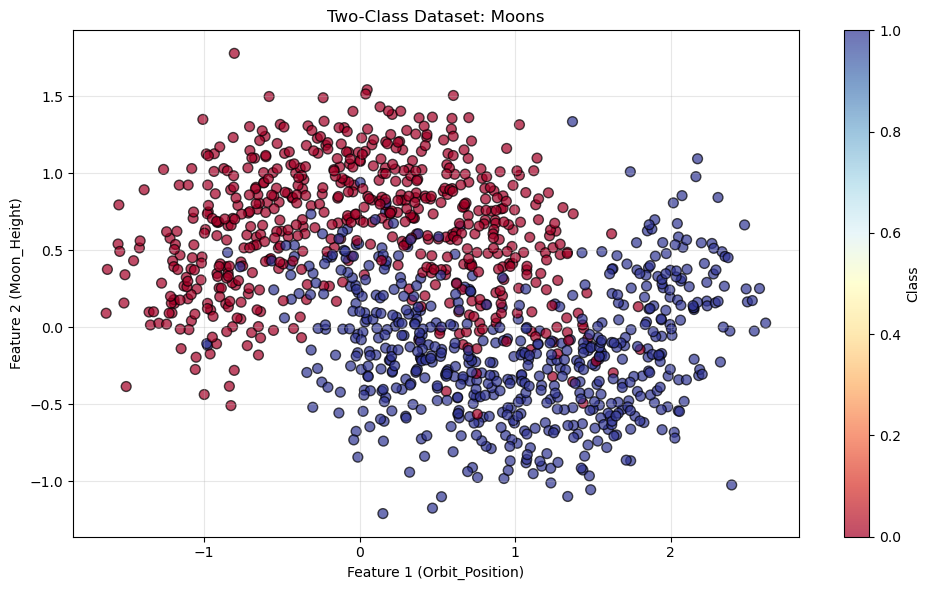

In [33]:
# Create a DataFrame for the dataset with descriptive column names
X_simple, y_simple = make_moons(n_samples=1200, noise=0.3, random_state=42)
df_simple = pd.DataFrame(X_simple, columns=['Orbit_Position', 'Moon_Height'])
df_simple['Class'] = y_simple

print(f"Dataset shape: {df_simple.shape}")
print(f"Features: {list(df_simple.columns[:-1])}")
print(f"Classes: {df_simple['Class'].unique()}")
print(f"Samples per class: {df_simple['Class'].value_counts().values}")

# Visualize the dataset
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_simple['Orbit_Position'], df_simple['Moon_Height'], c=df_simple['Class'], 
                     cmap='RdYlBu', s=50, edgecolors='k', alpha=0.7)
plt.xlabel('Feature 1 (Orbit_Position)')
plt.ylabel('Feature 2 (Moon_Height)')
plt.title('Two-Class Dataset: Moons')
plt.colorbar(scatter, label='Class')
plt.grid(True, alpha=0.3)
plt.tight_layout()
print("\nDataset visualization saved as 'dataset_visualization.png'")

In [35]:
df_simple

,Orbit_Position,Moon_Height,Class
0,1.948977,0.548413,1
1,1.070010,-0.881636,1
2,0.754382,0.484413,0
3,-0.522496,0.512280,0
4,0.927322,0.308520,0
...,...,...,...
1195,2.392433,-1.025606,1
1196,2.056776,-0.548183,1
1197,1.867534,0.120279,1
1198,1.246602,-0.686263,1


## Building Your First Classifier — K-Nearest Neighbors (KNN)
The **K-Nearest Neighbors (KNN)** algorithm is one of the simplest yet powerful classification techniques.  
It classifies a new data point based on the **majority class of its nearest neighbors** in the feature space. For technical details on KNN in sklearn cna be found [here](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification).

### How KNN Works
1. **Choose the number of neighbors (K)**  
   This determines how many nearby points influence the prediction.  
2. **Measure distance** between the new data point and all training points (commonly using Euclidean distance).  
3. **Find the K closest training points**.  
4. **Assign the most common class** among those neighbors to the new data point.

### Key Hyperparameter
- **K (`n_neighbors`)** — the number of neighbors to consider.
  - Small `K` → More complex model (can **overfit** the training data).  
  - Large `K` → Simpler model (can **underfit**, missing patterns).


### Important Things to Know for Any ML Algorithm
Regardless of the algorithm you use in **scikit-learn** (KNN, Decision Tree, Logistic Regression, etc.), these are the core concepts to understand:

| Concept | Description |
|----------|--------------|
| **Model Objective** | What problem it solves — classification, regression, or clustering. |
| **Assumptions** | The kind of data or relationships the algorithm expects (e.g., linear vs non-linear). |
| **Key Hyperparameters** | The main knobs you can tune to control complexity and performance. |
| **Training Process (`fit`)** | How the algorithm learns from data. |
| **Prediction Process (`predict`)** | How it makes predictions on unseen data. |
| **Evaluation Metrics** | How you measure performance (accuracy, precision, recall, RMSE, etc.)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
df_simple.head()

,Orbit_Position,Moon_Height,Class
0,1.948977,0.548413,1
1,1.070010,-0.881636,1
2,0.754382,0.484413,0
3,-0.522496,0.512280,0
4,0.927322,0.308520,0


In [40]:
# Feature vector array
X = df_simple[['Orbit_Position', 'Moon_Height']].values

# Target variable vector array
y = df_simple['Class'].values


# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed

# Fit the model (this is essentially training the model)
knn.fit(X, y)

KNeighborsClassifier()

In [49]:
y

array([1, 1, 0, ..., 1, 1, 1])

### Making Predictions with a Trained Model

After fitting (training) a model in **scikit-learn**, the next step is to use it to make predictions on new or unseen data.

Most scikit-learn models provide multiple ways to generate predictions depending on what you need — **class labels**, **probabilities**, or **custom thresholds**.

#### Predicting Class Labels

Use the `.predict()` method to obtain the **final predicted class** for each observation:
```python
y_pred = model.predict(X_test)
```

#### Predicting Probabilities

Use `.predict_proba()` to get **class membership probabilities** instead of hard labels.

This method returns the probability of each sample belonging to each class.

For binary classification, `y_prob[:, 1]` gives the probability of the **positive class**.

Probabilities are particularly useful when you want to:
- Adjust classification thresholds
- Plot ROC or precision–recall curves
- Evaluate metrics such as ROC-AUC
```python
y_prob = model.predict_proba(X_test)
```

#### Controlling the Classification Threshold

By default, scikit-learn classifies a sample as class `1` if its predicted probability is greater than or equal to **0.5**.

You can adjust this **decision threshold** to make the model more **sensitive** (focus on recall) or more **specific** (focus on precision).

- Lower thresholds lead to more samples being classified as positive (↑ recall, ↓ precision)
- Higher thresholds make the model more conservative (↓ recall, ↑ precision)
```python
threshold = 0.4
y_pred_custom = (y_prob[:, 1] >= threshold).astype(int)
```


In [50]:
# Predict on new data points
X_new = np.array([[0.5, 0.0], [1.5, 0.5], [0.0, 1.0]])

# Use .predict and .predict_proba methods to make predictions
predicted_classes = knn.predict(X_new)
predicted_probabilities = knn.predict_proba(X_new)

print(f"\nPredictions for new data points {X_new} : {predicted_classes}")


Predictions for new data points [[0.5 0. ]
 [1.5 0.5]
 [0.  1. ]] : [1 1 0]


In [45]:
df_simple.Class.value_counts()

Class
1    600
0    600
Name: count, dtype: int64

In [44]:
predicted_probabilities

array([[0.4, 0.6],
       [0.4, 0.6],
       [0.8, 0.2]])

## Measuring Model Performance

In classification, **accuracy** is one of the simplest and most commonly used metrics for evaluating a model’s performance.  
It measures how often the classifier makes correct predictions.

### Definition
Accuracy is defined as the ratio of correctly predicted observations to the total number of observations:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Where:  
- **TP** = True Positives  
- **TN** = True Negatives  
- **FP** = False Positives  
- **FN** = False Negatives  

### scikit-learn code
```
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
```

### Computing Accuracy 
<img src="/Users/dmatekenya/Library/CloudStorage/GoogleDrive-dmatekenya@gmail.com/My Drive/TEACHING/AIMS-DSCBI/docs/images/computing-perfomance.png" alt="Computing Model Performance" width="600"/>

Before training a model, we split the dataset into **training** and **test** sets to fairly evaluate performance.  
- The **training set** is used by the model to learn patterns.  
- The **test set** is kept aside to check how well the model generalizes to unseen data.

We use `train_test_split` from **scikit-learn** to do this easily:
```python
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y_simple, test_size=0.3, random_state=42, stratify=y_simple
)

)
```
- test_size=0.3 → 30% of data used for testing.
- random_state=42 → ensures reproducibility.
- stratify=y_simple → keeps class proportions the same in both sets.

### Note on Reproducibility
- Many operations in machine learning — like splitting data or initializing model parameters — involve **randomness**.  
- By setting a fixed `random_state` (any integer), you **control the random number generator**, ensuring that every time you run the code, the random choices (such as which samples go into training or test sets) are **exactly the same**.
- This makes your results **reproducible** — meaning you and others will get the same split, the same training data, and therefore the same model behavior across runs.



In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y_simple, test_size=0.3, random_state=42, stratify=y_simple
)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors' as needed
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
from sklearn.metrics import accuracy_score

predicted_classes = knn.predict(X_test)
actual_classes = y_test
accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"\nKNN Classifier Accuracy on Test Set: {accuracy:.2f}")


KNN Classifier Accuracy on Test Set: 0.91


## Model Complexity

Model complexity refers to how **flexible** or **expressive** a model is in learning patterns from data.  
A model that is too simple may miss important patterns (**underfitting**), while one that is too flexible may learn noise as if it were signal (**overfitting**).

In **K-Nearest Neighbors (KNN)**, model complexity is controlled by the number of neighbors (**K**):

- **Larger K → Less complex model → May underfit**  
  - The model becomes smoother and less sensitive to individual data points.  
  - It may miss fine-grained patterns, resulting in poor performance on both training and test data.

- **Smaller K → More complex model → May overfit**  
  - The model closely follows training data points, including noise.  
  - It performs very well on the training set but poorly on unseen data.

---

### Model Complexity in General Terms
The concept of complexity applies to nearly all machine learning models:

| Model Type | Complexity Controlled By | Effect of High Complexity |
|-------------|--------------------------|----------------------------|
| **KNN** | Number of neighbors (**K**) | Fits closely to local data; may overfit |
| **Decision Tree** | Tree depth / number of leaves | Learns noise; deep trees overfit easily |
| **Linear Regression / Logistic Regression** | Regularization strength (**C**, **alpha**) | Very small regularization may overfit |
| **Neural Networks** | Number of layers and neurons | Highly flexible; prone to overfitting if not regularized |
| **Random Forest / Boosting** | Number and depth of trees | Too many deep trees can overfit |

---

### The Goal
The objective in model building is to find the **right balance** —  
a model that is **complex enough** to capture real patterns but **simple enough** to generalize well to new data.

This balance is often referred to as the **bias–variance tradeoff**:
- **High bias (low complexity)** → underfitting  
- **High variance (high complexity)** → overfitting


### Visualizing Decision Boundaries and Misclassifications

This section visualizes how the **K-Nearest Neighbors (KNN)** classifier makes predictions for different values of **K**.  

1. **Decision Regions**  
   - The background colors show the regions in feature space where the model predicts each class.  
   - These are generated by creating a fine grid of points, passing them to the model’s `predict()` function, and coloring each region by its predicted class.

2. **Training vs. Test Points**  
   - **Training points** are plotted with partial transparency to show how the model fits the known data.  
   - **Test points** are overlaid to evaluate generalization.

3. **Misclassified Points**  
   - Test samples that are **incorrectly classified** (model prediction ≠ true label) are outlined in red.  
   - These help you see where the model struggles — typically around complex or overlapping decision boundaries.

4. **Effect of K (Model Complexity)**  
   - Small **K** → Complex boundaries that tightly follow training data (**may overfit**).  
   - Large **K** → Smoother, simpler boundaries that may miss finer patterns (**may underfit**).

By comparing plots across different values of **K**, you can visually understand the trade-off between **model complexity** and **generalization performance**.


In [39]:
def plot_decision_boundary(model, X_train, y_train, X_test, y_test, ax, title):
    # Mesh over feature space
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Color maps (2-class example)
    cm_bg = ListedColormap(["#B3D4FF", "#FFD4A8"])   # background (soft)
    cm_pts = ListedColormap(["#1f77b4", "#ff7f0e"])  # points (bold)

    # Regions + boundary line
    ax.contourf(xx, yy, Z, alpha=0.35, cmap=cm_bg, antialiased=True)
    ax.contour(xx, yy, Z, levels=np.unique(Z), colors="k", linewidths=0.8, alpha=0.6)

    # Train points (faded)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_pts,
               s=25, edgecolors="k", alpha=0.45, label="Train")

    # Test predictions + misclassifications
    y_test_pred = model.predict(X_test)
    correct = y_test_pred == y_test
    wrong = ~correct

    # Correct test points
    ax.scatter(X_test[correct, 0], X_test[correct, 1], c=y_test[correct], cmap=cm_pts,
               s=40, edgecolors="k", alpha=0.95, marker="o", label="Test (correct)")

    # Misclassified test points (red ring)
    ax.scatter(X_test[wrong, 0], X_test[wrong, 1], facecolors="none",
               edgecolors="red", s=120, linewidths=2.0, marker="o", label="Test (misclassified)")

    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(title)
    ax.grid(True, alpha=0.25)
    ax.legend(loc="upper right", fontsize=9, frameon=True)


K= 1 | Train: 1.000 | Test: 0.983
K= 3 | Train: 0.993 | Test: 1.000
K= 5 | Train: 0.993 | Test: 1.000
K=15 | Train: 0.986 | Test: 0.983
K=50 | Train: 0.893 | Test: 0.967

Decision boundaries saved as 'knn_decision_boundaries.png'


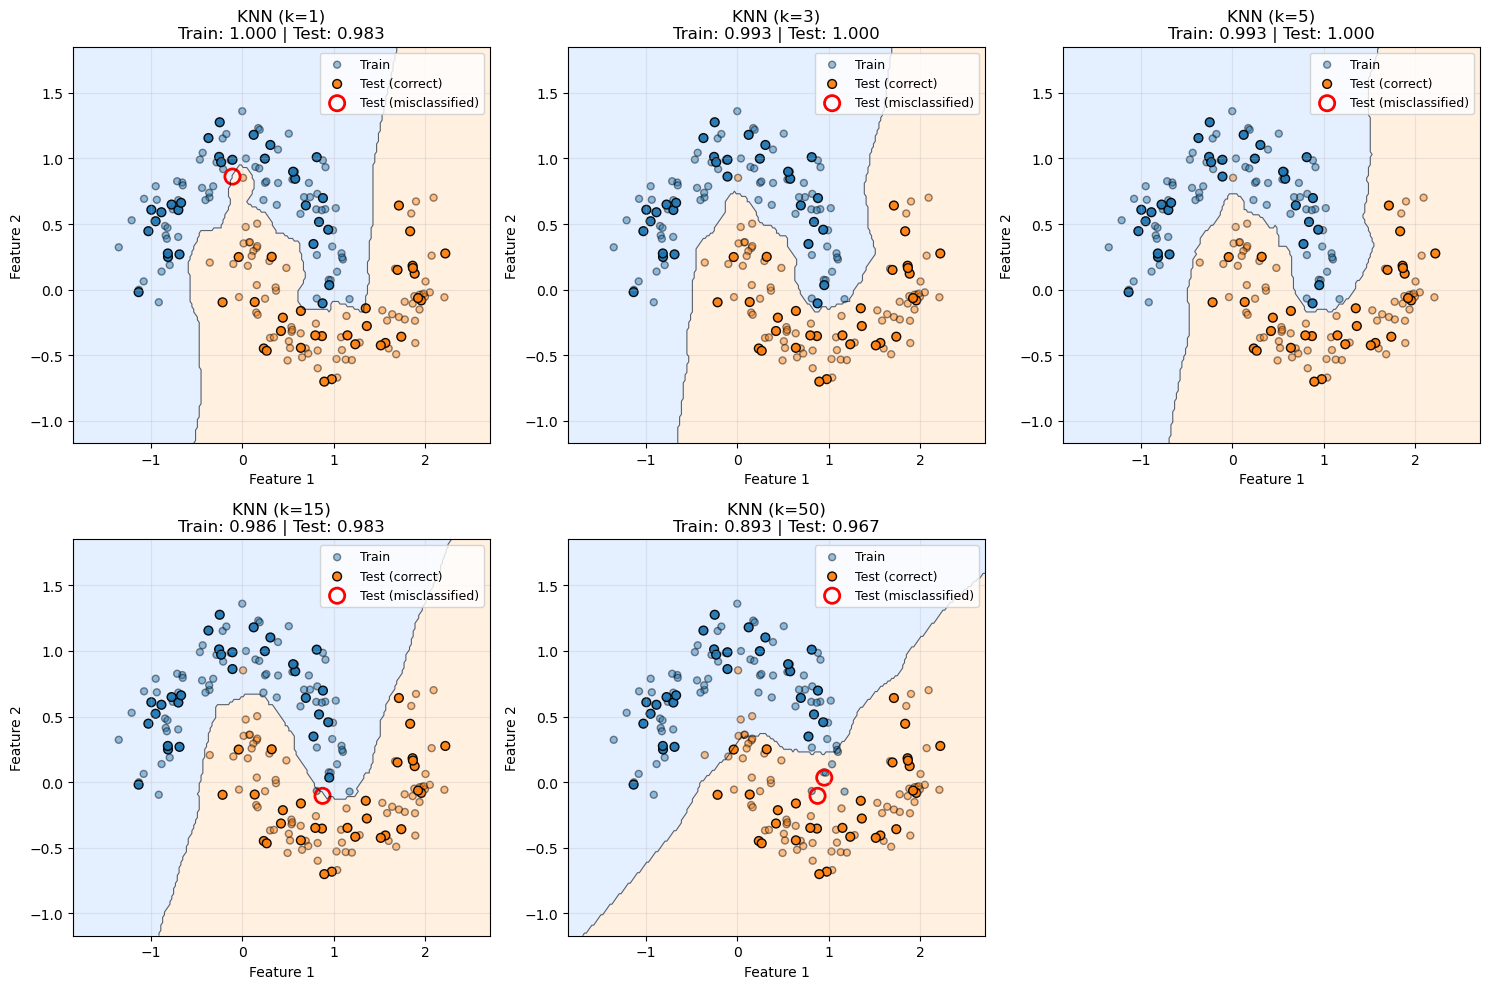

In [ ]:

k_values = [1, 3, 5, 15, 50]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_acc = knn.score(X_train, y_train)
    test_acc  = knn.score(X_test, y_test)

    plot_decision_boundary(
        knn, X_train, y_train, X_test, y_test, axes[idx],
        f"KNN (k={k})\nTrain: {train_acc:.3f} | Test: {test_acc:.3f}"
    )
    print(f"K={k:2d} | Train: {train_acc:.3f} | Test: {test_acc:.3f}")

# remove empty subplot
axes[-1].remove()
plt.tight_layout()
print("\nDecision boundaries saved as 'knn_decision_boundaries.png'")

In [51]:
df_pop = pd.read_csv(FILE_BUILDINGS)

In [52]:
df_pop.head()

,cell_id,province_name,district_name,sector_name,cell_name,elderly_60,general_20,children_under5,youth_15_24,men_2020,women_2020,building_count
0,RWA.1.1.1.1_1,Amajyaruguru,Burera,Bungwe,Bungwe,241.693282,3855.623385,495.422606,758.093936,1850.711053,2004.912332,1435.0
1,RWA.1.1.1.2_1,Amajyaruguru,Burera,Bungwe,Bushenya,229.611624,3669.128833,470.655098,720.896415,1761.457437,1907.671396,884.0
2,RWA.1.1.1.3_1,Amajyaruguru,Burera,Bungwe,Mudugari,109.718616,1756.630395,225.188715,345.073314,843.263769,913.366626,530.0
3,RWA.1.1.1.4_1,Amajyaruguru,Burera,Bungwe,Tumba,318.065743,5174.177333,666.434701,1016.066328,2482.353880,2691.823510,1512.0
4,RWA.1.1.2.1_1,Amajyaruguru,Burera,Butaro,Gatsibo,335.976866,6046.478580,833.994018,1264.716616,2880.475354,3166.003226,2036.0


## EXERCISE 1: Build and Compare 3 Classifiers

### Objective
Predict areas with high elderly population dependency using KNN, Random Forest, and Logistic Regression.

### Dataset
**File**: `adm4-population-buildings.csv` (Download from Datasets folder in Google Drive)

### Instructions

#### Step 1: Create Target Variable
- Calculate the 75th percentile of the `elderly_60` column
- Create a binary target `high_dependence`:
  - `1` if `elderly_60` ≥ 75th percentile
  - `0` if `elderly_60` < 75th percentile
- Check the class distribution

#### Step 2: Prepare Features
**Exclude these columns** from your features:
- `'cell_id'`, `'province_name'`, `'district_name'`, `'sector_name'`, `'cell_name'`, `'elderly_60'`

**Create**:
- Feature matrix `X` (all columns except excluded ones and target)
- Target vector `y` (the `high_dependence` column)

#### Step 3: Train-Test Split
- Split data: 70% train, 30% test (use `stratify=y` and `random_state=42`)

#### Step 4: Build 3 Models
Train and evaluate each model:

**Model 1: KNN (n_neighbors=5)**
- Report train and test accuracy

**Model 2: Random Forest (n_estimators=100, max_depth=10)**
- Report train and test accuracy
- Show top 5 most important features

**Model 3: Logistic Regression (max_iter=1000)**
- Report train and test accuracy

#### Step 5: Compare Results
Create a comparison table with:
- Model name
- Training accuracy
- Test accuracy
- Overfitting gap (train - test)

**Discussion questions**:
1. Which model performs best on test data?
2. Which model shows the most overfitting?
3. Which model would you recommend for deployment? Why

In [61]:
# Create binary target variable 'high_dep' based on 75th percentile of 'elderly_60'
pop_75 = np.percentile(df_pop['elderly_60'], 75)
df_pop['high_dep'] = df_pop['elderly_60'].apply(lambda x: 1 if x >= pop_75 else 0)

In [69]:
exclude = ['cell_id', 'province_name', 'district_name', 'sector_name ',
       'cell_name', 'elderly_60', 'high_dep']
features = [col for col in df_pop.columns if col not in exclude]
print(features)

# Create X and y arrays
X_pop = df_pop[features].values
y_pop = df_pop['high_dep'].values

['general_20', 'children_under5', 'youth_15_24', 'men_2020', 'women_2020', 'building_count']


In [63]:
df_pop['high_dep'].value_counts(normalize=True)

high_dep
0    0.749654
1    0.250346
Name: proportion, dtype: float64

## Building Your First Regressor — Linear Regression

The **Linear Regression** algorithm is one of the most fundamental and widely used techniques for regression problems.  
It models the relationship between input features and a continuous target variable by fitting a **straight line (or hyperplane)** that minimizes prediction error.

### How Linear Regression Works

1. **Define the relationship**  
   Linear Regression assumes a linear relationship between the input features $X$ and the target variable $y$.

   - **Simple Linear Regression (one feature):**  
     $$
     \hat{y} = \beta_0 + \beta_1 x
     $$

   - **Multiple Linear Regression (multiple features):**  
     $$
     \hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n
     $$

2. **Estimate coefficients**  
   The algorithm finds the best-fit coefficients $\beta_i$ that minimize the **error (or loss) function**, commonly defined as the **Sum of Squared Errors (SSE)**:
   $$
   SSE = \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
   $$

   Minimizing this function ensures that the predicted values $\hat{y}_i $ are as close as possible to the actual values $y_i$. This loss function is called Ordinary Least Squares (OLS).

3. **Make predictions**  
   Once trained, the model predicts new values by applying the learned coefficients to new input data.


### Key Parameters and Concepts
- **Coefficients (`coef_`)** → Represent how much each feature contributes to the target value.  
- **Intercept (`intercept_`)** → The baseline prediction when all features are zero.  
- **Assumption** → The relationship between inputs and target is approximately **linear**.


### Example in scikit-learn
```python
from sklearn.linear_model import LinearRegression

# Initialize the model
lin_reg = LinearRegression()

# Train (fit) the model
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)


### Predicting blood glucose levels
We will use the Diabetes dataset to predict blood glucose levels using Linear Regression. You can get details of the dataset [here](https://archive.ics.uci.edu/dataset/34/diabetes)

In [6]:
df_diabetes = pd.read_csv(FILE_DIABETES)

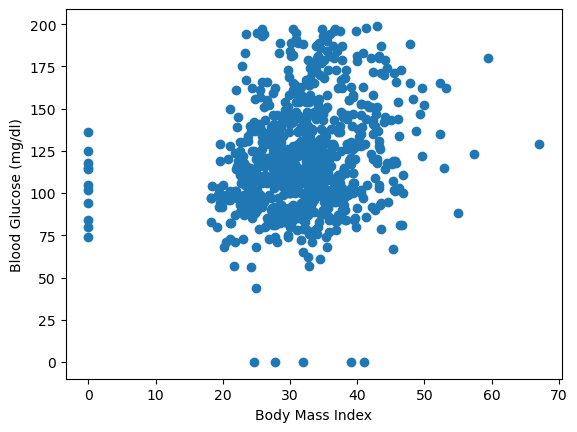

In [58]:
plt.scatter(df_diabetes["BMI"], df_diabetes["Glucose"])
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

#### Fit a Simple Linear Regression
- BMI predicts blood sugar 

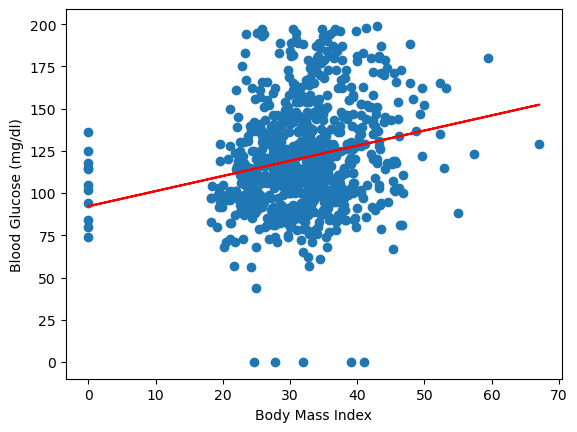

In [62]:
from sklearn.linear_model import LinearRegression

# Prepare the feature and target arrays
X_bmi = df_diabetes[["BMI"]].values
y = df_diabetes["Glucose"].values

reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='red')
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

#### Multiple Linear Regression
- Features: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
- Target: BloodGlucose

In [7]:
# Decide which features to use for multiple linear regression
features = ["Pregnancies", "BloodPressure", "SkinThickness",
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Prepare the feature and target arrays
X = df_diabetes[features].values
y = df_diabetes["Glucose"].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Create a linear regression model
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

NameError: name 'LinearRegression' is not defined

### Evaluating Linear Regression Model

After training a **Linear Regression** model, it’s important to evaluate how well it predicts continuous target values.  
Unlike classification models that use metrics such as accuracy or precision, regression models are evaluated using **error-based** and **goodness-of-fit** metrics.



#### 1. Mean Absolute Error (MAE)
Measures the **average absolute difference** between the predicted and actual values.  
It gives an idea of how far predictions are from the true values, on average.

$$
MAE = \frac{1}{m} \sum_{i=1}^{m} \left| y_i - \hat{y}_i \right|
$$

- Easy to interpret in the same units as the target variable.  
- Treats all errors equally, regardless of direction or magnitude.



#### 2. Mean Squared Error (MSE)
Calculates the **average of squared differences** between predicted and actual values.  
Squaring penalizes larger errors more heavily.

$$
MSE = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2
$$

- Sensitive to outliers.  
- Useful when larger errors are more undesirable.

#### 3. Root Mean Squared Error (RMSE)
The square root of MSE, providing an error measure in the **same units** as the target variable.

$$
RMSE = \sqrt{ \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 }
$$

- Easier to interpret than MSE.  
- Penalizes large deviations more than MAE.


#### 4. Coefficient of Determination (R² Score)
Represents how much of the variance in the target variable is **explained** by the model.

$$
R^2 = 1 - \frac{ \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 }{ \sum_{i=1}^{m} (y_i - \bar{y})^2 }
$$

Where:
- $ y_i$ → Actual values  
- $\hat{y}_i$ → Predicted values  
- $\bar{y}$ → Mean of actual values  

- $R^2 = 1$ → Perfect fit  
- $R^2 = 0$ → Model does no better than predicting the mean  
- $R^2 < 0$ → Model performs worse than a simple mean predictor


#### Example in scikit-learn
```python
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


In [71]:
# Compute metrics
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

Mean Absolute Error (MAE): 22.813
Mean Squared Error (MSE): 822.387
Root Mean Squared Error (RMSE): 28.677
R² Score: 0.150


## Regularized Regression

Recall that **Linear Regression** minimizes a loss function by choosing a coefficient (**a**) for each feature variable, along with an intercept (**b**).  
However, large coefficients can lead to **overfitting** — the model fits the training data too closely and performs poorly on unseen data.

**Regularization** addresses this problem by **penalizing large coefficients** in the loss function.


### Ridge Regression

- **Loss function** = OLS loss function +  
  $$
  \alpha \times \sum_{i=1}^{n} a_i^2
  $$

- Ridge penalizes large positive or negative coefficients.  
- **α** is a parameter we need to choose.  
- Selecting **α** is similar to choosing **k** in KNN.  
- **Hyperparameter**: a variable used to optimize model parameters.

#### α Controls Model Complexity
- **α = 0** → Equivalent to OLS (may lead to overfitting).  
- **Very high α** → Can lead to underfitting.


### Lasso Regression

- **Loss function** = OLS loss function +  
  $$
  \alpha \times \sum_{i=1}^{n} |a_i|
  $$

- Lasso performs **feature selection** by shrinking some coefficients to zero.  
- Coefficients of less important features become zero.  
- Features with non-zero coefficients are considered **important** and retained in the model.

### Try Out Ridge and LASSO Regression

In [8]:
from sklearn.linear_model import Ridge

scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    score = ridge.score(X_test, y_test)
    scores.append(score)
    print(f"Alpha: {alpha}, R² Score: {score:.4f}")


Alpha: 0.1, R² Score: 0.1500
Alpha: 1.0, R² Score: 0.1504
Alpha: 10.0, R² Score: 0.1538
Alpha: 100.0, R² Score: 0.1640
Alpha: 1000.0, R² Score: 0.1694


In [9]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    score = lasso.score(X_test, y_test)
    scores.append(score)
    print(f"Alpha: {alpha}, R² Score: {score:.4f}")

Alpha: 0.01, R² Score: 0.1502
Alpha: 1.0, R² Score: 0.1692
Alpha: 10.0, R² Score: 0.1799
Alpha: 20.0, R² Score: 0.1813
Alpha: 50.0, R² Score: 0.1568


### LASSO for Feature Selection

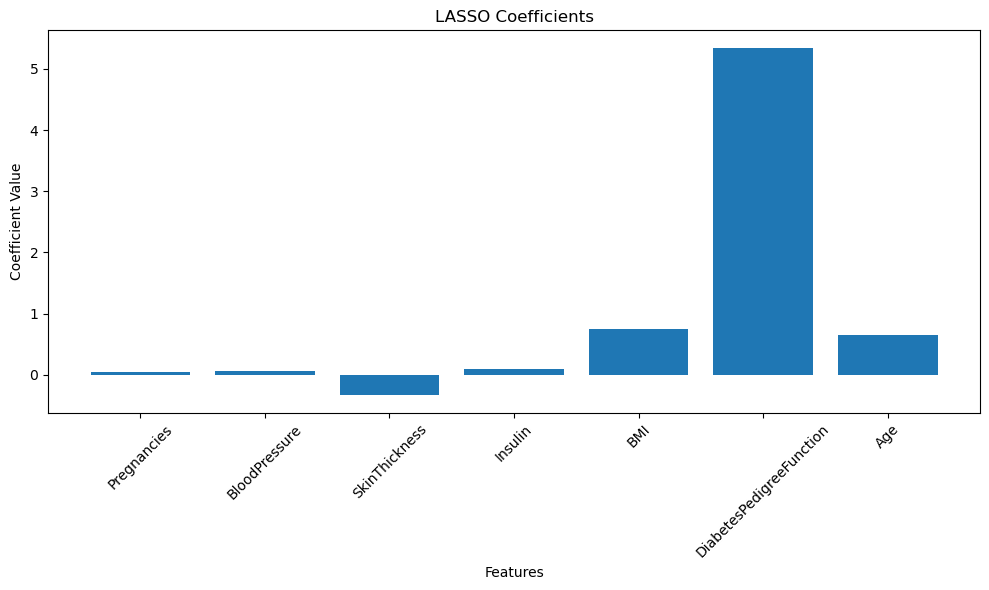

In [10]:
from sklearn.linear_model import Lasso

# Prepare data for LASSO visualization
X = df_diabetes.drop(["Glucose", "Outcome"], axis=1).values
y = df_diabetes["Glucose"].values
names = df_diabetes.drop(["Glucose", "Outcome"], axis=1).columns

# Fit LASSO model and get coefficients
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

# Visualize feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.title('LASSO Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

## Cross-Validation

When training machine learning models, we want to ensure that our model generalizes well to **unseen data**, not just the specific training set.  A simple train/test split might depend heavily on **how** the data was divided, which can make results unstable.  **Cross-Validation (CV)** helps overcome this limitation.

### What is Cross-Validation?

**Cross-Validation** is a resampling technique used to **evaluate model performance more reliably**.  
It works by splitting the dataset into multiple **folds** (subsets), training the model on some folds, and testing it on the remaining ones.  
This process is repeated several times so that each data point is used for both training and validation.


### Example: 5-Fold Cross-Validation

1. The data is split into **5 equal parts** (folds).  
2. The model trains on **4 folds** and validates on the **remaining 1 fold**.  
3. This process repeats **5 times**, each time using a different fold for validation.  
4. The performance metrics from all runs are then **averaged** to obtain a more robust estimate.

<img src="/Users/dmatekenya/My Drive (dmatekenya@gmail.com)/TEACHING/AIMS-DSCBI/docs/images/cross-validation.png" alt="Computing Model Performance" width="600"/>

Each fold gets a turn as the validation set, ensuring every sample is tested exactly once.

### Cross-validation with sklearn 
scikit-learn provides **two approaches** for performing cross-validation:

1. **Manual Cross-Validation (looping through folds)**  
   - You explicitly create the folds using a splitter like `KFold` or `StratifiedKFold`.  
   - Then, you manually loop over each fold to train and evaluate your model.  
   - This gives you full control over what happens in each iteration.
   ```python
   from sklearn.model_selection import KFold
   from sklearn.metrics import r2_score
   from sklearn.linear_model import LinearRegression
   import numpy as np

   kf = KFold(n_splits=5, shuffle=True, random_state=42)
   model = LinearRegression()
   scores = []

   for train_idx, val_idx in kf.split(X):
       X_train, X_val = X[train_idx], X[val_idx]
       y_train, y_val = y[train_idx], y[val_idx]

       model.fit(X_train, y_train)
       y_pred = model.predict(X_val)
       scores.append(r2_score(y_val, y_pred))

   print("R² scores:", scores)
   print("Mean R²:", np.mean(scores))

2. **Automated Cross-Validation (using helper functions)**
- The function cross_val_score() handles all the splitting, training, and evaluation automatically.
- You simply provide the model, the data (X, y), the number of folds, and the scoring metric.
``` python
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize model
model = LinearRegression()

# Perform 5-fold cross-validation using R² as the metric
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("R² scores for each fold:", scores)
print("Mean R² score:", np.mean(scores))

In [161]:
X, y

(array([[ 6.   , 72.   , 35.   , ..., 33.6  ,  0.627, 50.   ],
        [ 1.   , 66.   , 29.   , ..., 26.6  ,  0.351, 31.   ],
        [ 8.   , 64.   ,  0.   , ..., 23.3  ,  0.672, 32.   ],
        ...,
        [ 5.   , 72.   , 23.   , ..., 26.2  ,  0.245, 30.   ],
        [ 1.   , 60.   ,  0.   , ..., 30.1  ,  0.349, 47.   ],
        [ 1.   , 70.   , 31.   , ..., 30.4  ,  0.315, 23.   ]]),
 array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
        189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
        147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
        111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
         88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
         99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,  95,
        131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80,
        123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,
         85, 126,  96, 

### Demonstrate Cross-Validation Using Diabetes Dataset

In [162]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Create X and y arrays

In [163]:
X, y

(array([[ 6.   , 72.   , 35.   , ..., 33.6  ,  0.627, 50.   ],
        [ 1.   , 66.   , 29.   , ..., 26.6  ,  0.351, 31.   ],
        [ 8.   , 64.   ,  0.   , ..., 23.3  ,  0.672, 32.   ],
        ...,
        [ 5.   , 72.   , 23.   , ..., 26.2  ,  0.245, 30.   ],
        [ 1.   , 60.   ,  0.   , ..., 30.1  ,  0.349, 47.   ],
        [ 1.   , 70.   , 31.   , ..., 30.4  ,  0.315, 23.   ]]),
 array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
        189, 166, 100, 118, 107, 103, 115, 126,  99, 196, 119, 143, 125,
        147,  97, 145, 117, 109, 158,  88,  92, 122, 103, 138, 102,  90,
        111, 180, 133, 106, 171, 159, 180, 146,  71, 103, 105, 103, 101,
         88, 176, 150,  73, 187, 100, 146, 105,  84, 133,  44, 141, 114,
         99, 109, 109,  95, 146, 100, 139, 126, 129,  79,   0,  62,  95,
        131, 112, 113,  74,  83, 101, 137, 110, 106, 100, 136, 107,  80,
        123,  81, 134, 142, 144,  92,  71,  93, 122, 163, 151, 125,  81,
         85, 126,  96, 

In [164]:
from sklearn.model_selection import KFold

# Initialize 5-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Store R² scores for each fold
r2_scores = []

print("Manual Cross-Validation Results:")
print("-" * 50)

# Loop through each fold
for fold_idx, (train_idx, val_idx) in enumerate(kfold.split(X), start=1):
    # Split data into training and validation sets for this fold
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Initialize and train the model on this fold's training data
    lnr = LinearRegression()
    rf = RandomForestRegressor()

    lnr.fit(X_train_fold, y_train_fold)
    rf.fit(X_train_fold, y_train_fold)
    
    # Predict on validation set
    y_pred_fold_lnr = lnr.predict(X_val_fold)
    y_pred_fold_rf = rf.predict(X_val_fold)

    # Compute R² score for this fold
    r2_fold_lnr = r2_score(y_val_fold, y_pred_fold_lnr)
    r2_fold_rf = r2_score(y_val_fold, y_pred_fold_rf)

    
    r2_scores.append((r2_fold_lnr, r2_fold_rf))

    print(f"Fold {fold_idx}: R² (Linear Regression) = {r2_fold_lnr:.4f}, R² (Random Forest) = {r2_fold_rf:.4f}")

print("-" * 50)
print(f"Mean R² Score: {np.mean(r2_scores):.4f}")
print(f"Standard Deviation: {np.std(r2_scores):.4f}")

Manual Cross-Validation Results:
--------------------------------------------------
Fold 1: R² (Linear Regression) = 0.1360, R² (Random Forest) = 0.1795
Fold 2: R² (Linear Regression) = 0.2055, R² (Random Forest) = 0.2016
Fold 3: R² (Linear Regression) = 0.1996, R² (Random Forest) = 0.1383
Fold 4: R² (Linear Regression) = 0.2977, R² (Random Forest) = 0.2826
Fold 5: R² (Linear Regression) = 0.2130, R² (Random Forest) = 0.1645
--------------------------------------------------
Mean R² Score: 0.2018
Standard Deviation: 0.0511


## EXERCISE 2: Comparing Regressors with Cross-Validation

### Datasets
You will use the following datasets for this exercise:
1. **adm4-population-buildings.csv** — [Download here](https://drive.google.com/file/d/1QAcOGf33GjLNtU1Xkku2WJayMa07gfLJ/view?usp=sharing)  
2. **cell-ntl-2015-2020-2024.csv** — [Download here](https://drive.google.com/file/d/1f_4fiqxIejly0YmC088s9bxOfrABv9Sz/view?usp=share_link)


### Instructions

#### 1. Data Preparation
- Extract only the **2024 night light** data from `cell-ntl-2015-2020-2024.csv`.  
- Merge it with `adm4-population-buildings.csv` using the **common key column**.  
- Drop all redundant or non-numeric columns that are not useful for regression.  
- Ensure there are no missing values in your final dataset.

#### 2. Define the Prediction Task
- Your **target variable** is `general_population`.  
- Use all remaining numeric columns as **predictor variables**.

#### 3. Model Comparison
Build and evaluate the following regression models:
- **Linear Regression**  
- **Ridge Regression**  
- **Lasso Regression**

Use **5-fold cross-validation** to evaluate model performance for each regressor.  
Compute and compare 2 metrics:
- **Mean Squared Error (MSE)**
- **R² Score**

You can use `cross_val_score` or `cross_validate` from `sklearn.model_selection` to automate the process.

#### 4. Report Results
- Summarize the **average performance across folds** for each model.  
- Identify which model performs **best** based on your chosen evaluation metric(s).  
- Discuss whether regularization (Ridge or Lasso) improves model generalization.

#### 5. Feature Selection with Lasso
- Using the best-performing **Lasso model**, identify the **3 most important features**.  
- Report which features were **retained (non-zero coefficients)** and interpret their possible relevance to predicting population.

## Hyperparameter Tuning

In many models, we need to decide certain settings **before** training — these are called **hyperparameters**.

- **Random Forest:** choosing parameters like `n_estimators` (number of trees) and `max_depth` (maximum depth of each tree)  
- **KNN (k-Nearest Neighbors):** choosing `n_neighbors` (number of neighbors to consider)  

Hyperparameters control how a model learns — they are not learned from the data itself but are **set by the user**.


### Choosing the Correct Hyperparameters

1. Try different combinations of hyperparameter values  
2. Train and evaluate each model separately  
3. Compare their performance using a suitable metric  
4. Select the best-performing configuration  

This process is called **hyperparameter tuning**.

To avoid **overfitting** to the test set, we perform **cross-validation** on the **training data**.  
The test set is reserved for **final model evaluation** only.


### Automated Tuning Methods in Scikit-learn

- **Grid Search (`GridSearchCV`)**  
  Tries *all* possible combinations of hyperparameter values defined in a grid.  
  - Exhaustive but can be computationally expensive.  
  - Example: testing all combinations of `alpha = [0.1, 1, 10]` and `solver = ['saga', 'lbfgs']`.

- **Random Search (`RandomizedSearchCV`)**  
  Samples a fixed number of **random combinations** of hyperparameter values from specified ranges or distributions.  
  - Much faster for large search spaces.  
  - Useful when some parameters are less sensitive or ranges are wide.

# Hyperparameter Tuning fo Random Forest Classifier
- Manual 
- GridSearch 
- RandomSearch

## Task- Classification of Diabetes status using "outcome' variable

In [166]:
df_diabetes = pd.read_csv(FILE_DIABETES)

In [176]:
X = df_diabetes.drop(columns=["Outcome"]).values
y = df_diabetes["Outcome"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=10, max_depth=2, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=10, random_state=42)

In [177]:
accuracy = rf.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy on Test Set: {accuracy*100:.2f}%") 

Random Forest Classifier Accuracy on Test Set: 77.92%


In [197]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42, min_samples_split=50)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print(f"Random Forest Classifier Accuracy on Test Set: {accuracy*100:.2f}%") 


Random Forest Classifier Accuracy on Test Set: 79.22%


### GridSearchCV in scikit-learn

In [199]:
GridSearchCV?

Init signature:
GridSearchCV(
    estimator,
    param_grid,
    *,
    scoring=None,
    n_jobs=None,
    refit=True,
    cv=None,
    verbose=0,
    pre_dispatch='2*n_jobs',
    error_score=nan,
    return_train_score=False,
)
Docstring:     
Exhaustive search over specified parameter values for an estimator.

Important members are fit, predict.

GridSearchCV implements a "fit" and a "score" method.
It also implements "score_samples", "predict", "predict_proba",
"decision_function", "transform" and "inverse_transform" if they are
implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized
by cross-validated grid-search over a parameter grid.

Read more in the :ref:`User Guide <grid_search>`.

Parameters
----------
estimator : estimator object
    This is assumed to implement the scikit-learn estimator interface.
    Either estimator needs to provide a ``score`` function,
    or ``scoring`` must be passed.

param_grid : dict or list of

In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

# Initialize 5-fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3, 5, 10, 20],
    'min_samples_split': [1, 5, 10, 50]
}

# Initialize RandomForest classifier
rf = RandomForestClassifier(random_state=22)

# Perform grid search
rf_cv = GridSearchCV(rf, param_grid, cv=kf, scoring='accuracy')
rf_cv.fit(X_train, y_train)

print("Best parameters:", rf_cv.best_params_)
print("Best CV score:", rf_cv.best_score_)

Best parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best CV score: 0.7687458349993336


/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
90 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constra

### RandomSearch

In [201]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Initialize RandomForest classifier
rf = RandomForestClassifier(random_state=42)

# Perform randomized search
rf_cv = RandomizedSearchCV(rf, param_grid, cv=kf, n_iter=10, random_state=42)
rf_cv.fit(X_train, y_train)

print("Best parameters:", rf_cv.best_params_)
print("Best CV score:", rf_cv.best_score_)

Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}
Best CV score: 0.7703585232573638


/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/dmatekenya/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constrai

## Dealing with Categorical Data

Most **scikit-learn** models expect **numerical input features** — they cannot directly handle categorical (text or label) data.  
Therefore, categorical variables must be **converted into numeric form** before training a model.



### Why Convert?
Machine learning algorithms require numerical representations to compute distances, probabilities, or coefficients.  
To include categorical variables, we transform them into **binary (dummy) variables**, where each category becomes a separate feature:

| Category | Encoded Variable A | Encoded Variable B | Encoded Variable C |
|-----------|-------------------|-------------------|-------------------|
| A         | 1 | 0 | 0 |
| B         | 0 | 1 | 0 |
| C         | 0 | 0 | 1 |

- **0:** Observation was **not** that category  
- **1:** Observation **was** that category  


### Encoding Options

- scikit-learn: OneHotEncoder()
- pandas: get_dummies()

We will use a simple dataset called music genre which has alot of categorical variables. You can learn more about the dataset [here](https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre)

### Regression Task on the Music Dataset
- Predict song popularity based on music genre and other features

In [204]:
# We will use the music dataset
df_music = pd.read_csv(FILE_MUSIC)

# Replace ? with nan
df_music.replace('?', np.nan, inplace=True)

In [81]:
df_music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


/var/folders/4k/7vm8r4rj2g90lf39dt0pqwbr0000gn/T/ipykernel_69606/3545019716.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='music_genre', y='popularity', data=df_music, palette='Set2')


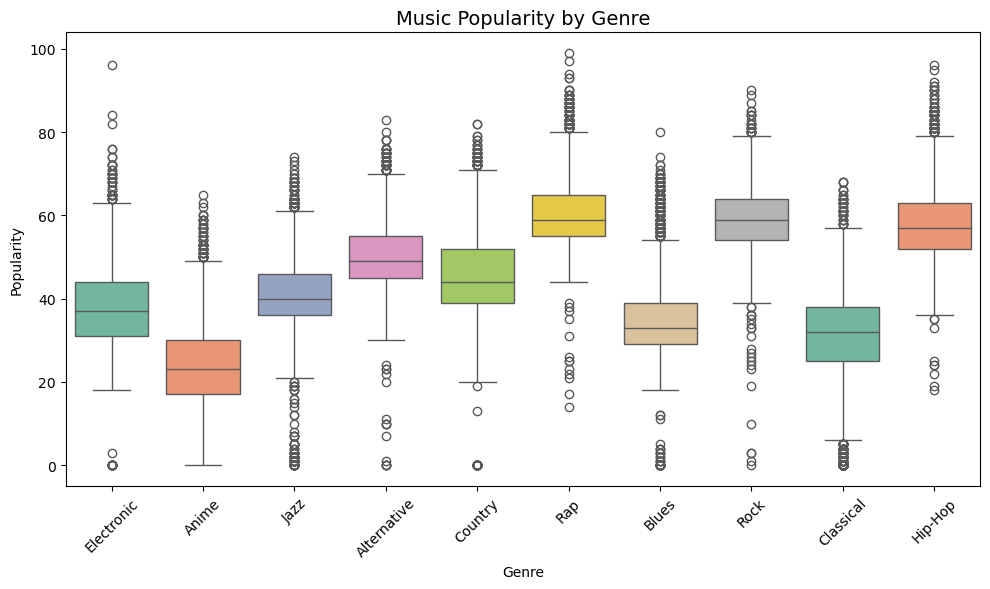

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='music_genre', y='popularity', data=df_music, palette='Set2')

# Customize the plot
plt.title('Music Popularity by Genre', fontsize=14)
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


#### Use Pandas to Encode Dummies 

In [205]:
genre_dummies = pd.get_dummies(df_music['music_genre'], prefix='genre', drop_first=True).astype(int)
genre_dummies.head()

,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0


In [207]:
# Drop NaNs
df_music.dropna(inplace=True)

# Create dummy variables for 'music_genre' with suffix '_genre'
genre_dummies = pd.get_dummies(df_music['music_genre'], prefix='genre', drop_first=True).astype(int)

# Add the new dummy columns back to the original DataFrame
df_music = pd.concat([df_music, genre_dummies], axis=1)

# Lets Shuffle the Dataframe
df_music.sample(frac=1).head()

# Display the updated DataFrame
df_music.head()
# Add the dummies 

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,...,music_genre,genre_Anime,genre_Blues,genre_Classical,genre_Country,genre_Electronic,genre_Hip-Hop,genre_Jazz,genre_Rap,genre_Rock
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,...,Electronic,0,0,0,0,1,0,0,0,0
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,...,Electronic,0,0,0,0,1,0,0,0,0
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,...,Electronic,0,0,0,0,1,0,0,0,0
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,...,Electronic,0,0,0,0,1,0,0,0,0
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,...,Electronic,0,0,0,0,1,0,0,0,0


#### Perfom Regression as Before 

In [122]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

drop_cols = ['popularity','obtained_date','instance_id', 'artist_name', 'track_name', "key", "mode", "music_genre"]
df_music2 = df_music.drop(drop_cols, axis=1)
df_music2['tempo'] = df_music2['tempo'].astype(float)
df_music2.head()


X = df_music2.values
y = df_music["popularity"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")

print(np.sqrt(-linreg_cv))

[9.4296124  9.58589065 9.52208865 9.43500339 9.45722919]


## Exercise 3: Encoding Categorical Variables with `OneHotEncoder`

In this exercise, you'll practice encoding categorical data using **scikit-learn’s `OneHotEncoder`**.

The dataset `df_music` contains two columns: encode the categorixal column: ```music_genre```

Your task:
1. Import and initialize a `OneHotEncoder`.  
2. Fit and transform the `music_genre` column.  
3. Create a new DataFrame with the encoded columns and add them back to `df_music`.  
4. Display the first few rows of the updated DataFrame.


### Steps to guide you

- Use `OneHotEncoder(sparse_output=False)` to return a dense array.  
- Retrieve the new column names using `encoder.categories_`.  
- Name each dummy variable with a clear prefix, e.g., `genre_Rock`, `genre_Pop`, etc.  
- Use `pd.concat()` to merge the new columns back into the original DataFrame.

## Centering and Scaling

Many machine learning models rely on **distance-based calculations** or **optimization algorithms**.  
When features are measured on different scales, those with larger ranges can **dominate** the model’s behavior.

For example:  
- **K-Nearest Neighbors (KNN)** explicitly uses distance to make predictions.  
- **Linear and Logistic Regression** use gradient-based optimization, which also benefits from features on similar scales.

To ensure fair contribution of all features, we **center and scale** them — a process called **standardization** or **normalization**.

### Why Scaling Matters
- Prevents one feature from disproportionately influencing the model.  
- Improves numerical stability and convergence in optimization.  
- Often improves performance for algorithms that use distances or gradients.


### How to Scale Data

1. **Standardization (Z-score scaling)**  
   - Subtract the **mean** and divide by the **standard deviation**.  
   - Centers features around **0** with a **variance of 1**.  
   $$
   z = \frac{x - \mu}{\sigma}
   $$

2. **Min–Max Scaling**  
   - Subtract the **minimum** and divide by the **range**.  
   - Scales values to the range **[0, 1]**.

3. **Normalization (to unit length)**  
   - Scales data so each feature (or sample) lies between **–1 and +1** or has unit length.  
   - Common in text and signal data.

In [125]:
# Prepare features and target from df_music
X = df_music2.values
y = df_music["popularity"].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit the scaler on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print statistics
print(f"Original data - Mean: {np.mean(X):.3f}, Std: {np.std(X):.3f}")
print(f"Scaled training data - Mean: {np.mean(X_train_scaled):.3f}, Std: {np.std(X_train_scaled):.3f}")

Original data - Mean: 11646.506, Std: 57419.395
Scaled training data - Mean: -0.000, Std: 1.000


## Exercise 4: Compare Perfomance of Scaled vs. Unscaled Features
- using the music dataset, perfom the following:
- Scale all the numeric variables using sklearn scaler: 
```'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'
```
- Build a model to predict "popularity" using scaled numeric features and music_genre variable. Remember to convert music_genre to numeric as shown above.
- Build another model with the numeric variables not scaled
- Use two models: Random Forest Regressor and Linear Regression to compare how they perfom on scaled vs. no scaled data
